In [3]:
import os
import cv2
import random
from skimage import feature 
import shutil
from skimage import data
from skimage import transform
from skimage.feature import SIFT
from skimage.color import rgb2gray
import csv

from Models import naive_bayes
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [4]:



def extract_sift_features(image_path):
    # Lee la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Inicializa el detector sift
    sift = feature.SIFT()
    
    # Detecta los puntos clave y los descriptores de la imagen
    sift.detect_and_extract(image)

    return sift.descriptors if sift.descriptors is not None else None


def split_train_test_data(root_folder, test_size=0.25, random_seed=42):
    # Lista para almacenar las características SIFT y sus respectivas etiquetas
    data = []
    
    # Recorre las carpetas en el directorio raíz
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        
        # Verifica si el elemento en la ruta es una carpeta
        if os.path.isdir(folder_path):
            # Lee todas las imágenes en la carpeta y agrega sus características SIFT a la lista con la etiqueta
            images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
            
            for img in images:
                caracteristicas = extract_sift_features(img)
                for i in range(0,15): #Solo se toma la mitad de las caracteristicas para agilizar el entrenamiento
                    data.append((caracteristicas[i], folder_name))




    # Filtra los elementos que no tienen características SIFT válidas
    data = [(features, label) for features, label in data if features is not None]

    # Divide los datos en conjuntos de entrenamiento y prueba
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_seed)

    print(f'Número de vectores (descriptores de sift) de entrenamiento: {len(train_data)}')
    print(f'Número de vectores (descriptores de sift) de prueba: {len(test_data)}')

    # Se escriben las cabezeras de los archivos csv
# Guardar las características SIFT y etiquetas en archivos CSV
    with open('train_data.csv', 'w', newline='') as train_file:
        train_writer = csv.writer(train_file)
        train_writer.writerow(['vector'] + ['label'])
        for i in range(0,len(train_data)):
            train_writer.writerow([[ t.tolist() for t in train_data[i][0]], train_data[i][1]])
            

    with open('test_data.csv', 'w', newline='') as test_file:
        test_writer = csv.writer(test_file)
        test_writer.writerow(['vector'] + ['label'])
        for i in range(0,len(test_data)):
            test_writer.writerow([[ t.tolist() for t in test_data[i][0]], test_data[i][1]])
 
    print("Extracción de características SIFT y división de datos completadas.")


# Ruta de la carpeta que contiene las carpetas de categorías
root_folder = 'complete_ms_data'

# Llamada a la función para dividir los datos y extraer características SIFT
split_train_test_data(root_folder)


Número de vectores (descriptores de sift) de entrenamiento: 3487
Número de vectores (descriptores de sift) de prueba: 1163
Extracción de características SIFT y división de datos completadas.


Precisión del modelo: 88.74%


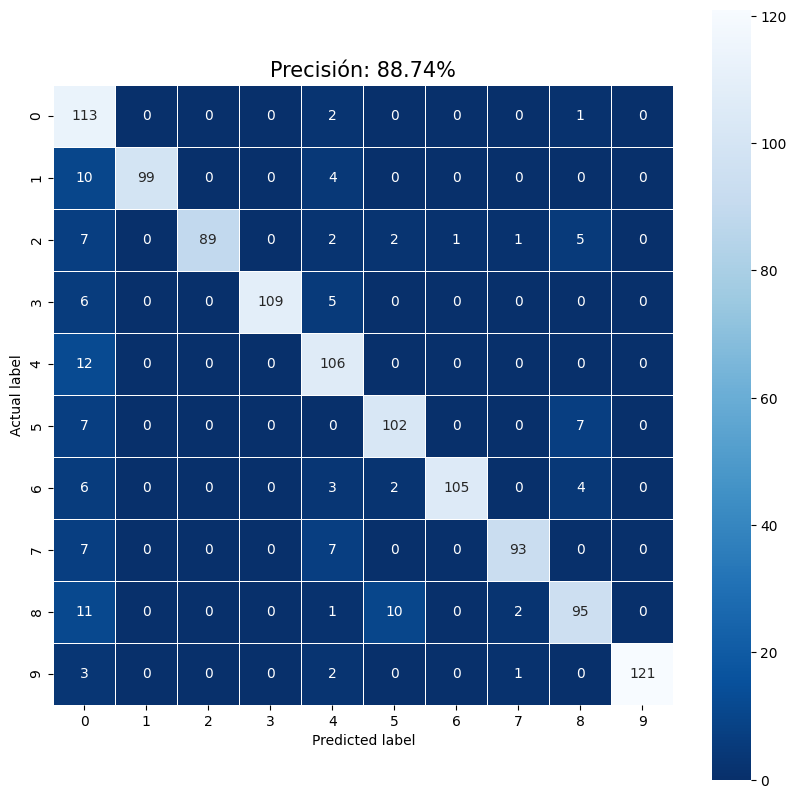

In [6]:
#Se entrena el modelo con las caracteristicas extraidas de las imagenes

model = naive_bayes.NaiveBayesClassifier()
X_train = []
y_train = []


'''vector,label
"[24, 114, 31, 0, 0, 0, 0, 0, 86, 107, 3, 0, 0, 0, 0, 1, 108, 11, 0, 0, 0, 0, 0, 23, 44, 0, 0, 0, 0, 0, 0, 24, 1, 42, 114, 15, 0, 0, 0, 0, 75, 114, 114, 11, 3, 1, 0, 9, 114, 23, 5, 2, 4, 15, 33, 114, 13, 0, 0, 0, 0, 5, 30, 74, 0, 33, 114, 20, 0, 0, 0, 0, 4, 31, 114, 114, 87, 9, 1, 2, 7, 5, 5, 18, 114, 114, 41, 24, 0, 0, 0, 0, 12, 83, 40, 10, 0, 1, 50, 89, 12, 0, 0, 0, 0, 0, 4, 45, 114, 7, 0, 0, 0, 0, 0, 12, 114, 26, 0, 0, 0, 0, 0, 1, 36, 55, 1, 0]",jelly_beans
"[74, 0, 0, 0, 0, 0, 0, 40, 96, 0, 0, 0, 0, 0, 0, 20, 93, 0, 0, 0, 0, 0, 0, 14, 68, 0, 0, 0, 0, 0, 0, 9, 151, 0, 0, 0, 18, 17, 9, 104, 151, 0, 0, 2, 28, 2, 0, 34, 151, 0, 0, 2, 20, 0, 0, 27, 151, 0, 0, 1, 9, 0, 0, 30, 11, 0, 0, 0, 151, 87, 8, 13, 30, 0, 0, 17, 151, 13, 0, 3, 43, 0, 0, 30, 151, 0, 0, 2, 45, 0, 0, 28, 151, 0, 0, 5, 0, 0, 0, 0, 30, 39, 6, 0, 0, 0, 0, 3, 62, 9, 0, 0, 0, 0, 0, 10, 75, 0, 0, 0, 0, 0, 0, 15, 67, 0, 0, 0]",glass_tiles
"[39, 10, 0, 0, 0, 0, 0, 0, 45, 2, 0, 0, 0, 0, 0, 2, 33, 0, 0, 0, 0, 0, 0, 11, 21, 0, 0, 0, 0, 0, 0, 12, 108, 23, 0, 0, 0, 0, 0, 2, 141, 1, 0, 0, 0, 0, 0, 23, 120, 0, 0, 0, 0, 0, 0, 37, 21, 0, 0, 0, 0, 0, 6, 47, 141, 86, 0, 0, 2, 1, 0, 5, 141, 13, 0, 0, 11, 12, 1, 30, 141, 4, 0, 0, 10, 51, 41, 107, 19, 0, 0, 0, 0, 36, 79, 79, 43, 20, 0, 12, 141, 40, 0, 1, 32, 2, 0, 0, 141, 119, 1, 6, 8, 0, 0, 0, 113, 141, 21, 8, 0, 0, 0, 0, 12, 112, 28, 1]",jelly_beans
'''

with open('train_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        X_train.append(row['vector'].replace('[','').replace(']','').replace(' ','').split(',') )
        y_train.append(row['label'])

X_train = np.array( X_train, dtype=float)
y_train = np.array(y_train)

model.fit(X_train, y_train)

#Se prueba el modelo con las caracteristicas extraidas de las imagenes

X_test = []
y_test = []

with open('test_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        X_test.append(row['vector'].replace('[','').replace(']','').replace(' ','').split(',') )
        y_test.append(row['label'])

X_test = np.array( X_test, dtype=float)
y_test = np.array(y_test)


y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


#Se meustra la matriz de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Precisión: {:.2f}%'.format(accuracy * 100)
plt.title(all_sample_title, size=15)
plt.show()

